Для городских жителей средний балл за экзамен  53.57388316151203, а медиана  55.0
Для деревенских жителей средний балл за экзамен  46.9277108433735, а медиана  50.0


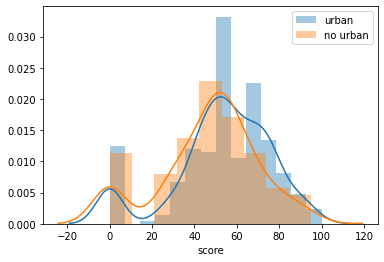

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x) # Проруск пустых сторок на None
# cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x) # Пропуск пустых значений на None
#students.groupby(by = ['schoolsup', 'paid'])['score'].plot(kind = 'bar', grid= True)

#from google.colab import files
#uploaded = files.upload()
students = pd.read_csv('stud.csv')
students.rename(columns={'studytime, granular': 'granular'}, inplace=True)
students.drop(['romantic'], inplace=True, axis=1)

students.drop(['failures'], inplace=True, axis=1)
students.drop(['Fedu'], inplace=True, axis=1)
students.drop(['traveltime'], inplace=True, axis=1)
students.drop(['granular'], inplace=True, axis=1)
students.drop(['health'], inplace=True, axis=1)
students.drop(['freetime'], inplace=True, axis=1)
students.drop(['absences'], inplace=True, axis=1)
students
# Для начала проведем первичный осмотр данных(каждый столбец отдельно)

# School
# print(students.school.value_counts())
# students.school.hist()
# Данные для датасета взяты на основе 2-х школ, пропусков и ошибок нет.
# Так как большинство(~90%) учеников из одной школы, то можно сделать заметку(из какой школы все ученики) и убрать данный столбец
#students.drop(['school'], inplace=True, axis=1)

# Sex
# print(students.sex.value_counts())
# students.sex.hist()
# Почти равное соотношение девочек и мальчиков, также отсутствуют ошибки и пропуски

# Age
# print(students.age.value_counts())
# students.age.hist()
# Основное количество школьников от 15 до 19 лет, также отсутствуют ошибки и пропуски

# Address
# print(students.address.value_counts())
# students.age.hist()
# Большинсво проживает в городе

# FamSize
# students.famsize = students.famsize.astype(str).apply(lambda x: None if x.strip() == '' else x) # Проверка на наличие ошибок
# print(students.famsize.value_counts())
# students.famsize.dropna() #Для дальнейших действий уберём эти 27 человек, так как много вариантов для заполения.
# students.famsize.hist()
# 27 человек с неопределенным количеством человек в семье.

# Pstatus
# students.Pstatus.dropna()
# print(students.Pstatus.value_counts())
# students.Pstatus.hist()
# В основном родители живут совместно, но есть непонятное состояние(Nan). Поэтому также уберём эти данные

# Medu
#students.Medu = students.Medu.astype(str).apply(lambda x: None if x.strip() == '' else x)
# print(students.Medu.value_counts())
# students.Medu.hist()
# Образование у матерей преобладает высшее или среднее(1 классов).

# Fedu
#students.Fedu = students.Fedu.astype(str).apply(lambda x: None if x.strip() == '' else x)
# print(students.Fedu.value_counts())
# students.Fedu.hist()
# Образование у отцов преобладает среднее(11 классов) или среднее специальное
# В общем случае образование родителей(обоих) будет влиять на дальнейшие итоговые показатели, но в данном случае сильнее скоррелированы образование матери - итоговые баллы.

# Mjob
# students.Mjob.dropna()
# print(students.Mjob.value_counts())
# students.Mjob.hist()
# В данном случае таке распределение можно назвать нормальным,смещенным влево.

# Fjob
# students.Fjob.dropna()
# print(students.Fjob.value_counts())
# students.Fjob.hist()
# Как и в случае с матерью, работа отца другая - неизвестная. Пропуски в данных имеются, для этого уберём их.

# Reason
# students.reason.dropna()
# print(students.reason.value_counts())
# students.reason.hist()
# Данные в этом столбце не стали исклюяением, здесь также присутствуют пропуски(17)

# Guardian
# students.guardian.dropna()
# print(students.guardian.value_counts())
# students.guardian.hist()
# В основном опекуном школьника является мать, 31 пропуск

# Traveltime
# students.traveltime.dropna()
# print(students.traveltime.value_counts())
# students.traveltime.hist()
# Большинство учеников живет рядом со школой.
# Исходя из полученных данных корреляционной таблицы можно судить о том, чем ближе ученик живет к школе тем лучше итоговые показатели
# Аномальных значении нет, пропуски убраны

# Studytime
# students.studytime.dropna()
# print(students.studytime.value_counts())
# students.studytime.hist()
# Основное количество учеников тратит на учёбу дома до 2.5 часов,
# и исходя из данных корреляционноый таблицы можно заменить тенденцию,
# если ученик будет уделять больше времени на учебу дома, то его результаты станут лучше. Ошибок(аномальных значений) нет.

# Failures, Fedu,Traveltime, [studytime, granular], Health, Absences, Freetime - данные этих столбцов не несут никакой информации, которая как - нибудь связывала бы результаты с итоговыми показателями по математике.
# Так как знаxение корреляции отрицательное, либо близко к нулю. И в дальнейшем не будем рассматривать их.

# Schoolsup
# students.schoolsup.dropna()
# print(students.schoolsup.value_counts())
# students.schoolsup.hist()
# Почти все ученики обходятся без дополнительной образовательных поодержки

# Famsup
# students.famsup.dropna()
# print(students.famsup.value_counts())
# students.famsup.hist()
# Примерно половина учащихся,без учета пропусков, обходится без семейной поддержки

# Paid
# students.paid.dropna()
# print(students.paid.value_counts())
# students.paid.hist()
# Примерно половина учащихся,без учета пропусков, обходится без платных дополнительных услуг


# Activities
# students.activities.dropna()
# print(students.activities.value_counts())
# students.activities.hist()
# Почти все ученики обходятся без дополнительных образовательных услуг

# Nursery
# students.nursery.dropna()
# print(students.nursery.value_counts())
# students.nursery.hist()
# Почти все ученики обходятся без дополнительных образовательных услуг

# Higher
# students.higher.dropna()
# print(students.higher.value_counts())
# students.higher.hist()
# Почти все ученики обходятся без дополнительных образовательных услуг

# Internet
# students.internet.dropna()
# print(students.internet.value_counts())
# students.internet.hist()
# Почти все ученики обходятся без дополнительных образовательных услуг

# Goout
# students.goout.dropna()
# print(students.goout.value_counts())
# students.goout.hist()
# Почти все ученики обходятся без дополнительных образовательных услуг

# Score
# students.score.dropna()
# print(students.score.value_counts())
# students.score.hist()
# Пропусков и аномальных значений нет, если не брать в учет данные 37 учеников, у которых 0 баллов, то распределение можно считать нормальным.

# На данном этапе попытался исследовать зависимость уровня знаний от места проживания(город и деревня), исходя из полученных данных можно судить, что у городских учеников выше итоговый балл по математике, нежели у деревенских.
stud = students[['address', 'score']]
stud = stud.dropna()
sns.distplot(stud[stud.address=='U'].score, label='urban')
sns.distplot(stud[stud.address=='R'].score, label='no urban')
plt.legend()
# Распределения признака сильно напоминает нормальное распределение.
print('Для городских жителей средний балл за экзамен  {}, а медиана  {}'.format(stud[stud.address=='U'].score.mean(), stud[stud.address=='U'].score.median()))
print('Для деревенских жителей средний балл за экзамен  {}, а медиана  {}'.format(stud[stud.address=='R'].score.mean(), stud[stud.address=='R'].score.median()))

# В итоге можно сделать вывод, что ученики,
#которые живут в городе и  уделявшие больше времени на учебу дома,
#плюс которые ходили на платные дополнительные занятия и
#имеющие поддержку со стороны семьи достигли больших результатов.